## Шаг 1. Изучение исходных данных

In [145]:
pip install termcolor

Note: you may need to restart the kernel to use updated packages.


In [ ]:
# Загружаем все необходимые библиотеки
from scipy import stats as st
from scipy.stats import shapiro , normaltest
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
from numpy import percentile
sns.set(color_codes=True)
from termcolor import colored



In [147]:
#Загружаем таблицы и передаем информации в переменные
data_calls = pd.read_csv('/datasets/calls.csv')
data_internet = pd.read_csv('/datasets/internet.csv')
data_messages = pd.read_csv('/datasets/messages.csv')
data_tariffs = pd.read_csv('/datasets/tariffs.csv')
data_users = pd.read_csv('/datasets/users.csv')



In [148]:
data_calls.head(10)

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000
5,1000_5,2018-11-02,0.00,1000
6,1000_6,2018-10-18,0.00,1000
7,1000_7,2018-08-22,18.31,1000
8,1000_8,2018-09-15,18.44,1000
9,1000_9,2018-08-15,0.00,1000


In [149]:
data_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


In [150]:
data_calls['duration'].describe()

count    202607.000000
mean          6.755887
std           5.843365
min           0.000000
25%           1.300000
50%           6.000000
75%          10.700000
max          38.000000
Name: duration, dtype: float64

#### Краткий вывод по таблице звонков:
- call_date - столбец с информацией о дате имеет тип object, необходимо преобразовать в правильный тип datetime
- duration - есть нулевые значения. Необходимо проанализировать сколько их, откуда они, и как их отсеить. 
- пропусков нет, дубликаты определим на слудующем этапе анализа.
---

In [151]:
data_internet.head(10)

,id,mb_used,session_date,user_id
0,1000_0,112.95,2018-11-25,1000
1,1000_1,1052.81,2018-09-07,1000
2,1000_2,1197.26,2018-06-25,1000
3,1000_3,550.27,2018-08-22,1000
4,1000_4,302.56,2018-09-24,1000
5,1000_5,399.97,2018-10-02,1000
6,1000_6,540.08,2018-09-07,1000
7,1000_7,415.70,2018-07-11,1000
8,1000_8,505.40,2018-10-08,1000
9,1000_9,345.54,2018-09-03,1000


In [152]:
data_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 4 columns):
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.6+ MB


In [153]:
data_internet['mb_used'].describe()

count    149396.000000
mean        370.192426
std         278.300951
min           0.000000
25%         138.187500
50%         348.015000
75%         559.552500
max        1724.830000
Name: mb_used, dtype: float64

#### Краткий вывод по таблице трафика:
- session_date - столбец с информацией о дате имеет тип object, необходимо преобразовать в правильный тип datetime
- mb_used - есть нулевые значения. Необходимо проанализировать сколько их, откуда они, и как их отсеить 
- пропусков нет, дубликаты определим на слудующем этапе анализа.
---

In [154]:
data_messages.head(10)

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000
5,1000_5,2018-06-20,1000
6,1000_6,2018-11-19,1000
7,1000_7,2018-10-29,1000
8,1000_8,2018-06-25,1000
9,1000_9,2018-12-18,1000


In [155]:
data_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


#### Краткий вывод  по таблице сообщений:
- message_date - столбец с информацией о дате имеет тип object, необходимо преобразовать в правильный тип datetime
- пропусков нет, дубликаты определим на слудующем этапе анализа.
---

In [156]:
data_tariffs.head(10)

,messages_included,mg_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [157]:
data_tariffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mg_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


#### Краткий вывод  по таблице тарифов:
По этой таблице вопросов не возникает

In [158]:
data_users.head(10)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
5,1005,67,NaN,Набережные Челны,Афанасий,Горлов,2018-01-25,smart
6,1006,21,NaN,Ульяновск,Леонид,Ермолаев,2018-02-26,smart
7,1007,65,NaN,Москва,Юна,Березина,2018-04-19,smart
8,1008,63,NaN,Челябинск,Рустэм,Пономарёв,2018-12-19,smart
9,1009,24,NaN,Пермь,Василиса,Блинова,2018-03-22,smart


In [159]:
data_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


#### Краткий вывод  по таблице пользователей:
- в столбце churn_date есть много пропусков согласно исходному описанию. Пропуски можно заменить индикаторным значением, чтобы их было видно на графиках.
- тип столбца reg_date необходимо преобразовать в datetime

###   Вывод по результатам предварительного изучения данных:
- во всех таблиц с датой call_date  , message_date , sessions_date , reg_date - столбец с информацией о дате имеет тип object, необходимо преобразовать в правильный тип datetime
duration - есть нулевые значения. Необходимо проанализировать сколько их, откуда они, и что с ними делать.
Необговоренных пропусков нет, дубликаты определим на слудующем этапе анализа.
----

 ##  Шаг 2. Предобработка данных

### Поиск дубликатов

In [160]:
#  Проверим дубликаты во всех таблицах 
print('Дубликаты в таблице звонков: {:>8}'.format( data_calls.duplicated().sum()))
print('Дубликаты в таблице трафика: {:>8}'. format(data_internet.duplicated().sum()))
print('Дубликаты в таблице сообщений: {:>6}'. format(data_messages.duplicated().sum()))
print('Дубликаты в таблице пользователей: {:>2}'. format(data_users.duplicated().sum()))


Дубликаты в таблице звонков:        0
Дубликаты в таблице трафика:        0
Дубликаты в таблице сообщений:      0
Дубликаты в таблице пользователей:  0


### Преобразование даты

In [161]:
# Проеобразуем столбец с датами в правильный тип данных
data_calls['call_date'] = pd.to_datetime(data_calls['call_date'], format ='%Y-%m-%d')
data_internet['session_date'] = pd.to_datetime(data_internet['session_date'], format ='%Y-%m-%d')
data_messages['message_date'] = pd.to_datetime(data_messages['message_date'], format ='%Y-%m-%d')
data_users['reg_date'] = pd.to_datetime(data_users['reg_date'], format ='%Y-%m-%d')


In [162]:
#Проверяем результаты замены 
data_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null datetime64[ns]
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 6.2+ MB


In [163]:
#Проверяем результаты замены 
data_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 4 columns):
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null datetime64[ns]
user_id         149396 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 4.6+ MB


In [164]:
#Проверяем результаты замены 
data_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null datetime64[ns]
user_id         123036 non-null int64
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 2.8+ MB


In [165]:
#Проверяем результаты замены 
data_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null datetime64[ns]
tariff        500 non-null object
dtypes: datetime64[ns](1), int64(2), object(5)
memory usage: 31.4+ KB


### <span style="color:blue">Анализ и отсеивание выбросов значений в столбце звонков "duration" </span>

In [166]:
# Проанализируем количество нулевых значений звонков
print('Количество нулевых звонков: {: >14}'.format(data_calls['duration'][data_calls['duration'] == 0 ].count()))
print('Максимальная длительность: {: >14}'.format(data_calls['duration'].max()))
print('Минимальная ненулевая длительность: {: >5}'.format(data_calls['duration'][data_calls['duration'] != 0 ].min()))

Количество нулевых звонков:          39613
Максимальная длительность:           38.0
Минимальная ненулевая длительность:  0.01


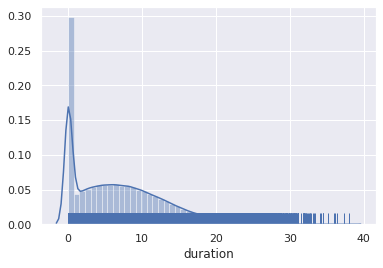

In [167]:
# Распределение значений звонков
sns.distplot(data_calls['duration'], kde=True, rug=True);

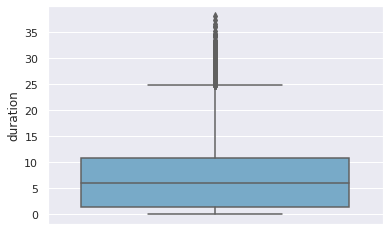

In [168]:
# Рассмотрим значения на графике с усами
sns.boxplot(y = data_calls['duration'] , palette='Blues');

In [169]:
# По нижней границе исключаем значения меньше 25% квартиля. данные записываем в массив
q25 = percentile(data_calls['duration'] , 25)
data_calls = data_calls.loc[data_calls['duration'] >q25]


In [170]:
# Функция определяет выбросы и выводит обработанную таблицу
def outliers_clear(data, column , k):
    q25 , q75 = percentile(data[column] , 25) , percentile(data[column] , 75)
    # Граница выбросов сверху
    upper = q75 + (q75 - q25) * k
    return data[data[column] < upper]

# Функция печати количества выбросов и чистых данных
def outliers_print(data ,column , k):
    print('Количество выбросов при k-факторе {}: {:>16}'. format(k ,len(data[column]) - len(outliers_clear(data, column , k))))
    print('Количество принимаемых значений при k-факторе {}: {}'. format(k ,len(outliers_clear(data ,column , k))))

Количество выбросов при k-факторе 1.5:             1445
Количество принимаемых значений при k-факторе 1.5: 150485


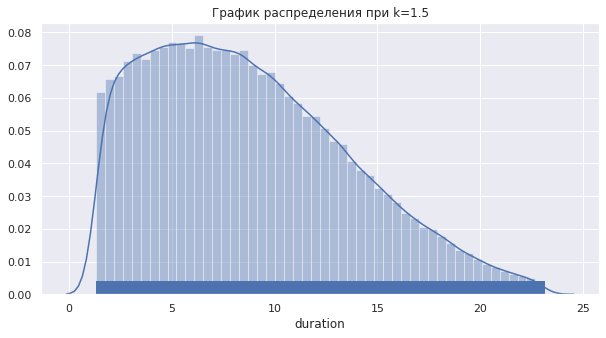

In [171]:
# Проверим распределение значений с отсеиванием выбросов с коэффициентом 1,5
outliers_print(data_calls , 'duration' , 1.5)
data_calls_clear_1 = outliers_clear(data_calls , 'duration' , 1.5)
plt.figure(figsize = (10,5))
plt.title('График распределения при k=1.5')
sns.distplot(data_calls_clear_1['duration'], kde=True, rug=True);
plt.show()


Количество выбросов при k-факторе 2:              302
Количество принимаемых значений при k-факторе 2: 151628


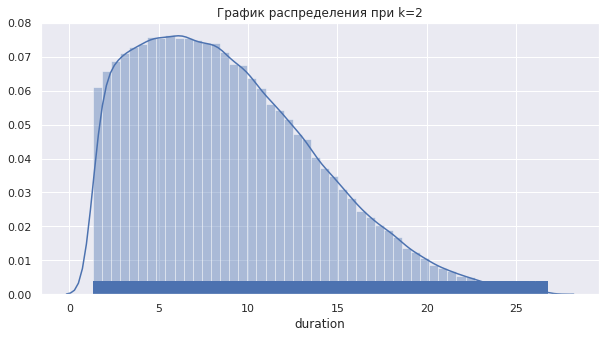

In [172]:
# Проверим распределение значений с отсеиванием выбросов с коэффициентом 2
outliers_print(data_calls , 'duration' , 2)
data_calls_clear_2 = outliers_clear(data_calls , 'duration' , 2)
plt.figure(figsize = (10,5))
plt.title('График распределения при k=2')
sns.distplot(data_calls_clear_2['duration'], kde=True, rug=True);
plt.show()

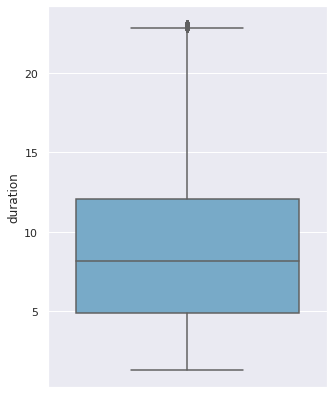

In [173]:
# Boxplot звонков без выбросов
plt.figure(figsize=(5,7))
sns.boxplot(y = data_calls_clear_1['duration'] , palette='Blues');
plt.show()

In [174]:
# Записываем выбранную таблицу в новый датафрейм
data_calls_clear = data_calls_clear_1

### <span style="color:green">Анализ и отсеивание выбросов значений в столбце трафика "mb_used" </span>

In [175]:
# Проанализируем количество нулевых значений трафика
print('Количество сессий с нулевым значением трафика: {: >5}'.format(data_internet['mb_used'][data_internet['mb_used'] == 0 ].count()))
print('Максимальная длительность сессии: {: >20}'.format(data_internet['mb_used'].max()))
print('Минимальная ненулевая длительность сессии: {: >8}'.format(data_internet['mb_used'][data_internet['mb_used'] != 0 ].min()))


Количество сессий с нулевым значением трафика: 19598
Максимальная длительность сессии:              1724.83
Минимальная ненулевая длительность сессии:     0.03


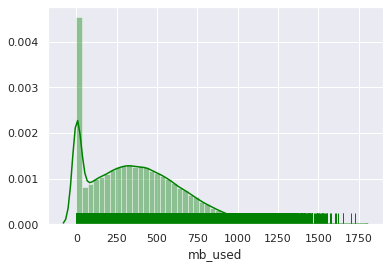

In [176]:
# Распределение значений трафика
sns.distplot(data_internet['mb_used'], kde=True, rug=True, color = 'green' );

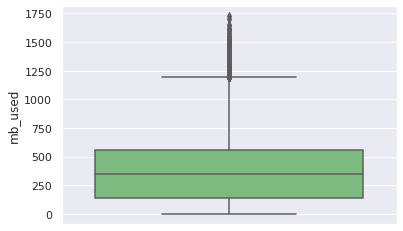

In [177]:
# Рассмотрим значения на графике с усами
sns.boxplot(y = data_internet['mb_used'] , palette='Greens');

In [178]:
# По нижней границе исключаем значения меньше 10МБ. 
print('Значение 1-го квартиля:',percentile(data_internet['mb_used'],25))
data_internet = data_internet.loc[data_internet['mb_used'] >10]

data_internet

Значение 1-го квартиля: 138.1875


,id,mb_used,session_date,user_id
0,1000_0,112.95,2018-11-25,1000
1,1000_1,1052.81,2018-09-07,1000
2,1000_2,1197.26,2018-06-25,1000
3,1000_3,550.27,2018-08-22,1000
4,1000_4,302.56,2018-09-24,1000
...,...,...,...,...
149390,1499_151,752.72,2018-10-11,1499
149391,1499_152,318.90,2018-10-03,1499
149392,1499_153,490.13,2018-12-14,1499
149394,1499_155,1246.32,2018-11-26,1499


Количество выбросов при k-факторе 1.5:              880
Количество принимаемых значений при k-факторе 1.5: 127899


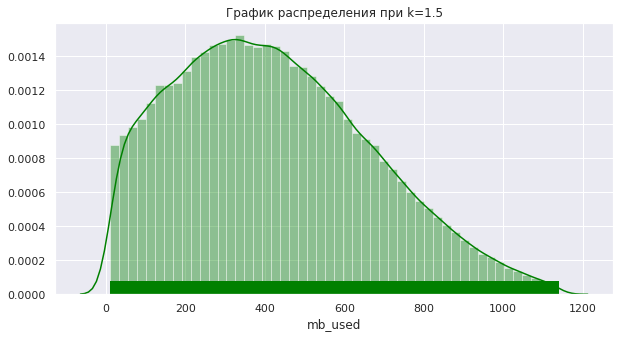

In [179]:
# Проверим распределение значений с отсеиванием выбросов с коэффициентом 1.5
outliers_print(data_internet , 'mb_used' , 1.5)
data_internet_clear_1= outliers_clear(data_internet , 'mb_used' , 1.5)
plt.figure(figsize = (10,5))
plt.title('График распределения при k=1.5')
sns.distplot(data_internet_clear_1['mb_used'], kde=True, rug=True , color = 'green');
plt.show()

Количество выбросов при k-факторе 2:              161
Количество принимаемых значений при k-факторе 2: 128618


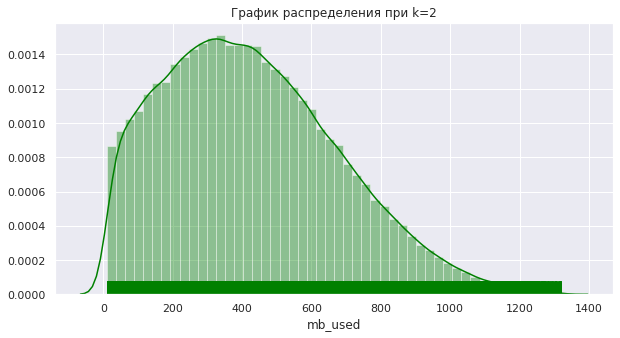

In [180]:
# Проверим распределение значений с отсеиванием выбросов с коэффициентом 2
outliers_print(data_internet , 'mb_used' ,2)
data_internet_clear_2= outliers_clear(data_internet , 'mb_used' , 2)
plt.figure(figsize = (10,5))
plt.title('График распределения при k=2')
sns.distplot(data_internet_clear_2['mb_used'], kde=True, rug=True , color = 'green');
plt.show()

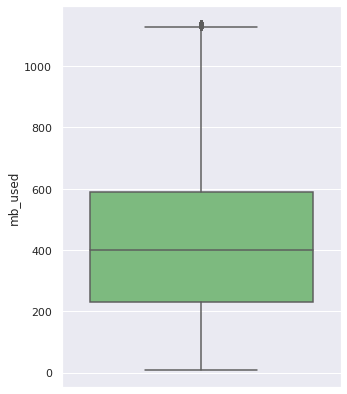

In [181]:
# Boxplot трафика без выбросов
plt.figure(figsize=(5,7))
sns.boxplot(y = data_internet_clear_1['mb_used'] , palette='Greens');
plt.show()

In [182]:
data_internet_clear = data_internet_clear_1

In [183]:
# Заменим значения индексов в таблице с пользователями
data_users.index = range(1000,1500)
data_users.index

RangeIndex(start=1000, stop=1500, step=1)

In [184]:
# Добавляем столбец с месяцем, годом в таблицу с пользователями
# Дата регистрации
data_users['month_reg'] = pd.DatetimeIndex(data_users.loc[:,'reg_date']).month
data_users['year_reg'] = pd.DatetimeIndex(data_users.loc[:,'reg_date']).year

# Дата прекращения тарифа
data_users['month_churn'] = pd.DatetimeIndex(data_users.loc[:,'churn_date']).month
data_users['year_churn'] = pd.DatetimeIndex(data_users.loc[:,'churn_date']).year

data_users.loc[:,'month_churn'] = data_users['month_churn'].fillna(0)
data_users.loc[:,'month_reg'] = data_users['month_reg'].fillna(0)


In [185]:
# Добавляем всех, кто не пользовался услугами, но был подключен к тарифу
def func_add_zero(data_pivot , data_user): # data_pivot - сводная таблица, 
                                     #  data_user - таблица с пользователями, 
                                                    #которые подключены к тарифу но ничего с ним не делали
    for index in data_user.index:
        month_reg =  data_user.loc[index , 'month_reg']
        month_churn = data_user.loc[index , 'month_churn']
    # Проверяем когда пользователь прекратил пользоваться тарифом
        n = 13 if month_churn ==0  else month_churn+1 if month_churn==month_reg else month_churn         
        for m in range(month_reg , int(n)):
        #Записываем в таблицу нулевые значения количества сообщений, когда пользователь был подключен к тарифу
            data_pivot.loc[(index , m), :] = 0
    return data_pivot.sort_values(by = 'user_id')

### Расчет количества сделанных звонков и израсходованных минут разговора по месяцам

In [186]:
# Добавляем столбец с месяцем, годом
data_calls_clear.loc[:,'month'] = pd.DatetimeIndex(data_calls_clear['call_date']).month
data_calls_clear.loc[:,'year'] = pd.DatetimeIndex(data_calls_clear['call_date']).year

data_calls_clear.head(5)
# Округляем значение  длительностей звонков
data_calls_clear.loc[:,'duration'] = data_calls_clear['duration'].apply(np.ceil)
data_calls_clear

/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:376: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,id,call_date,duration,user_id,month,year
2,1000_2,2018-06-11,3.0,1000,6,2018
3,1000_3,2018-09-21,14.0,1000,9,2018
4,1000_4,2018-12-15,6.0,1000,12,2018
7,1000_7,2018-08-22,19.0,1000,8,2018
8,1000_8,2018-09-15,19.0,1000,9,2018
...,...,...,...,...,...,...
202601,1499_214,2018-12-05,3.0,1499,12,2018
202603,1499_216,2018-10-18,19.0,1499,10,2018
202604,1499_217,2018-11-10,11.0,1499,11,2018
202605,1499_218,2018-10-06,5.0,1499,10,2018


In [187]:
# Проверим все ли пользователи делали звонки
print('Всего звонивших в отсортированных данных:' , len(data_calls_clear['user_id'].unique()))
print('Всего звонивших в исходной таблице:' , len(data_calls['user_id'].unique()))


Всего звонивших в отсортированных данных: 492
Всего звонивших в исходной таблице: 492


In [188]:
print('Список пользователей, которые не звонили')
data_users_no_call = data_users[~data_users['user_id'].isin(data_calls_clear.groupby('user_id').count().index)]
data_users_no_call

Список пользователей, которые не звонили


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,month_reg,year_reg,month_churn,year_churn
1091,1091,36,NaN,Набережные Челны,Вера,Суслова,2018-05-08,ultra,5,2018,0.0,NaN
1106,1106,67,NaN,Калуга,Исаак,Костин,2018-04-26,ultra,4,2018,0.0,NaN
1128,1128,51,2018-12-23,Волжский,Ксения,Агаева,2018-12-15,ultra,12,2018,12.0,2018.0
1231,1231,63,NaN,Чебоксары,Касьян,Авдюков,2018-05-23,ultra,5,2018,0.0,NaN
1328,1328,44,NaN,Мурманск,Рауль,Аркадьев,2018-10-16,ultra,10,2018,0.0,NaN
1371,1371,50,2018-12-30,Омск,Ириней,Трофимов,2018-12-25,smart,12,2018,12.0,2018.0
1473,1473,18,NaN,Красноярск,Николай,Лебедев,2018-08-05,ultra,8,2018,0.0,NaN
1489,1489,35,NaN,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart,8,2018,0.0,NaN


In [189]:
# Сводная таблица суммы длительности звонков по каждому пользователю
data_calls_pivot_sum_count= data_calls_clear.pivot_table(
                                index = ['user_id','month'] ,                        
                                values = 'duration' ,
                                aggfunc = ['sum', 'count'])

# Заменяем названия столбцов
data_calls_pivot_sum_count.columns =['calls_sum' , 'calls_count']

In [190]:
# Добавляем всех, кто не звонил, но пользовался тарифом
data_calls_pivot_sum_count = func_add_zero(data_calls_pivot_sum_count , data_users_no_call)
data_calls_pivot_sum_count

calls_sum  calls_count
user_id month                        
1000    5          158.0         16.0
        6          171.0         27.0
        7          336.0         38.0
        8          383.0         40.0
        9          461.0         42.0
...                  ...          ...
1498    9          465.0         49.0
1499    9           45.0          7.0
        10         448.0         43.0
        11         580.0         56.0
        12         487.0         51.0

[3206 rows x 2 columns]

### Расчет количества отправленных сообщений по месяцам

In [191]:
# Добавляем столбец с месяцем, годом
data_messages.loc[:,'month'] = pd.DatetimeIndex(data_messages.loc[:,'message_date']).month
data_messages.loc[:,'year'] = pd.DatetimeIndex(data_messages.loc[:,'message_date']).year

data_messages.head(5)

,id,message_date,user_id,month,year
0,1000_0,2018-06-27,1000,6,2018
1,1000_1,2018-10-08,1000,10,2018
2,1000_2,2018-08-04,1000,8,2018
3,1000_3,2018-06-16,1000,6,2018
4,1000_4,2018-12-05,1000,12,2018


In [192]:
# Сводная таблица количества сообщений по каждому пользователю
data_messages_pivot_count = data_messages.pivot_table(
                                index = ['user_id','month'] ,
                                values = 'id' ,
                                aggfunc = 'count')
# Заменяем пропуски нулями
data_messages_pivot_count[data_messages_pivot_count.isnull()] = 0

# Заменяем названия столбцов
data_messages_pivot_count.columns = ['messages_count']

data_messages_pivot_count

messages_count
user_id month                
1000    5                  22
        6                  60
        7                  75
        8                  81
        9                  57
...                       ...
1498    10                 42
1499    9                  11
        10                 48
        11                 59
        12                 66

[2717 rows x 1 columns]

In [193]:
# Проверим все ли пользователи отправляли сообщения
print('Всего отправлявших сообщения в исходной таблице:' , len(data_messages['user_id'].unique()))

Всего отправлявших сообщения в исходной таблице: 426


In [194]:
print('Список пользователей, которые не отправляли сообщения')
data_users_no_sms = data_users[~data_users['user_id'].isin(data_messages.groupby('user_id').count().index)]
data_users_no_sms

Список пользователей, которые не отправляли сообщения


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,month_reg,year_reg,month_churn,year_churn
1001,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart,11,2018,0.0,NaN
1006,1006,21,NaN,Ульяновск,Леонид,Ермолаев,2018-02-26,smart,2,2018,0.0,NaN
1010,1010,26,NaN,Тюмень,Эдуард,Кононов,2018-08-05,smart,8,2018,0.0,NaN
1017,1017,73,NaN,Краснодар,Мария,Аленникова,2018-05-22,smart,5,2018,0.0,NaN
1024,1024,73,NaN,Санкт-Петербург,Иулиан,Антипов,2018-10-31,ultra,10,2018,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1462,1462,72,NaN,Тольятти,Алёна,Абрамычева,2018-10-29,smart,10,2018,0.0,NaN
1466,1466,37,NaN,Новосибирск,Рубен,Шевцов,2018-02-28,ultra,2,2018,0.0,NaN
1469,1469,41,NaN,Сочи,Аксён,Абалкин,2018-07-06,ultra,7,2018,0.0,NaN
1479,1479,40,NaN,Хабаровск,Игорь,Богданов,2018-07-03,smart,7,2018,0.0,NaN


In [195]:
# Добавляем всех, кто не отправлял сообщения, но был подключен к тарифу
data_messages_pivot_count = func_add_zero(data_messages_pivot_count , data_users_no_sms)
data_messages_pivot_count

messages_count
user_id month                
1000    5                22.0
        6                60.0
        7                75.0
        8                81.0
        9                57.0
...                       ...
1498    10               42.0
1499    12               66.0
        9                11.0
        10               48.0
        11               59.0

[3185 rows x 1 columns]

### Расчет объема израсходованного интернет-трафика по месяцам

In [196]:
# Добавляем столбец с месяцем, годом
data_internet_clear.loc[:,'month'] = pd.DatetimeIndex(data_internet_clear['session_date']).month
data_internet_clear.loc[:,'year'] = pd.DatetimeIndex(data_internet_clear['session_date']).year

data_internet_clear.head(5)

# Округляем значение трафика и приводим к целым числам
data_internet_clear.loc[:,'mb_used'] = data_internet_clear['mb_used'].apply(np.ceil)
data_internet_clear

,id,mb_used,session_date,user_id,month,year
0,1000_0,113.0,2018-11-25,1000,11,2018
1,1000_1,1053.0,2018-09-07,1000,9,2018
3,1000_3,551.0,2018-08-22,1000,8,2018
4,1000_4,303.0,2018-09-24,1000,9,2018
5,1000_5,400.0,2018-10-02,1000,10,2018
...,...,...,...,...,...,...
149389,1499_150,274.0,2018-11-20,1499,11,2018
149390,1499_151,753.0,2018-10-11,1499,10,2018
149391,1499_152,319.0,2018-10-03,1499,10,2018
149392,1499_153,491.0,2018-12-14,1499,12,2018


In [197]:
# Сводная таблица суммы трафика по каждому пользователю
data_internet_clear_pivot_sum = data_internet_clear.pivot_table(
                                index = ['user_id','month'] ,
                                values = 'mb_used' ,
                                aggfunc = 'sum')

# Заменяем названия столбцов
data_internet_clear_pivot_sum.columns = ['mb_used_sum']
data_internet_clear_pivot_sum


mb_used_sum
user_id month             
1000    5           2256.0
        6          22059.0
        7          14010.0
        8          14070.0
        9          14581.0
...                    ...
1498    10         20601.0
1499    9           1841.0
        10         16624.0
        11         15449.0
        12         13076.0

[3201 rows x 1 columns]

In [198]:
# Проверим все ли пользователи выходили в инет
print('Всего выходивших в инет в отсортированных данных:' , len(data_internet_clear['user_id'].unique()))
print('Всего выходивших в инет в исходной таблице:' , len(data_internet['user_id'].unique()))

Всего выходивших в инет в отсортированных данных: 497
Всего выходивших в инет в исходной таблице: 497


In [199]:
print('Список пользователей, которые не выходили в инет')
data_users_no_trafik = data_users[~data_users['user_id'].isin(data_internet_clear.groupby('user_id').count().index)]
data_users_no_trafik

Список пользователей, которые не выходили в инет


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,month_reg,year_reg,month_churn,year_churn
1128,1128,51,2018-12-23,Волжский,Ксения,Агаева,2018-12-15,ultra,12,2018,12.0,2018.0
1273,1273,46,NaN,Курган,Рэм,Корнилов,2018-05-15,ultra,5,2018,0.0,NaN
1371,1371,50,2018-12-30,Омск,Ириней,Трофимов,2018-12-25,smart,12,2018,12.0,2018.0


In [200]:
# Добавляем всех, кто не пользовался интернетом, но был подключен к тарифу
data_internet_clear_pivot_sum = func_add_zero(data_internet_clear_pivot_sum , data_users_no_trafik)
data_internet_clear_pivot_sum

mb_used_sum
user_id month             
1000    5           2256.0
        6          22059.0
        7          14010.0
        8          14070.0
        9          14581.0
...                    ...
1498    9          22165.0
1499    11         15449.0
        10         16624.0
        9           1841.0
        12         13076.0

[3211 rows x 1 columns]

### Расчет помесячной выручки с каждого пользователя

In [201]:
#Объединяем сводные таблицы в одну
data_pivot_total = pd.concat([data_calls_pivot_sum_count , 
           data_messages_pivot_count,
           data_internet_clear_pivot_sum],axis=1)
data_pivot_total


calls_sum  calls_count  messages_count  mb_used_sum
user_id month                                                     
1000    5          158.0         16.0            22.0       2256.0
        6          171.0         27.0            60.0      22059.0
        7          336.0         38.0            75.0      14010.0
        8          383.0         40.0            81.0      14070.0
        9          461.0         42.0            57.0      14581.0
...                  ...          ...             ...          ...
1498    10         244.0         27.0            42.0      20601.0
1499    9           45.0          7.0            11.0       1841.0
        10         448.0         43.0            48.0      16624.0
        11         580.0         56.0            59.0      15449.0
        12         487.0         51.0            66.0      13076.0

[3216 rows x 4 columns]

In [202]:
# Добавляем месяца, когда пользователи не пользовались услугами, но были подключены к тарифу
for index in data_users.index:
    month_reg = data_users.loc[index , 'month_reg'] 
    month_data = data_pivot_total.loc[index].index 
    for i in range(month_reg , 13):     
        if i not in month_data: 
            data_pivot_total.loc[(index , i), :] = 0
    
data_pivot_total = data_pivot_total.sort_values(by='user_id')
data_pivot_total

calls_sum  calls_count  messages_count  mb_used_sum
user_id month                                                     
1000    5          158.0         16.0            22.0       2256.0
        6          171.0         27.0            60.0      22059.0
        7          336.0         38.0            75.0      14010.0
        8          383.0         40.0            81.0      14070.0
        9          461.0         42.0            57.0      14581.0
...                  ...          ...             ...          ...
1498    10         244.0         27.0            42.0      20601.0
1499    9           45.0          7.0            11.0       1841.0
        10         448.0         43.0            48.0      16624.0
        12         487.0         51.0            66.0      13076.0
        11         580.0         56.0            59.0      15449.0

[3259 rows x 4 columns]

In [203]:
# Проверим пропуски и нули в таблице
data_pivot_total.isna().sum()

calls_sum         10
calls_count       10
messages_count    31
mb_used_sum        5
dtype: int64

In [204]:
# Заполняем пропуски нулями 
data_pivot_total = data_pivot_total.fillna(0)
data_pivot_total.isna().sum()

calls_sum         0
calls_count       0
messages_count    0
mb_used_sum       0
dtype: int64

In [205]:
# Считаем выручку для каждого пользователя без учета абонентской платы
# Копируем датафрейм, чтобы в нем менять значения 
# Приводим все к целым числам
data_pivot_revenue = data_pivot_total.copy(deep=True).drop('calls_count',1).astype(int)
data_pivot_revenue

calls_sum  messages_count  mb_used_sum
user_id month                                        
1000    5            158              22         2256
        6            171              60        22059
        7            336              75        14010
        8            383              81        14070
        9            461              57        14581
...                  ...             ...          ...
1498    10           244              42        20601
1499    9             45              11         1841
        10           448              48        16624
        12           487              66        13076
        11           580              59        15449

[3259 rows x 3 columns]

In [206]:
for index in data_pivot_revenue.index:                                                       
   # Присваиваем индекс тарифа пользователя index[0]
    tariff_index = 0 if data_users.loc[index[0] , 'tariff']=='smart' else 1 
    #  В новый столбец записываем ежемесясную абонентскую плату
    data_pivot_revenue.loc[index , 'rub_monthly_fee'] = data_tariffs.loc[tariff_index , 'rub_monthly_fee']  
   # В переменные записываем информацию о тарифе
    rub_per_call = data_tariffs.loc[tariff_index , 'rub_per_minute']
    rub_per_mess = data_tariffs.loc[tariff_index , 'rub_per_message']
    rub_per_mb =   data_tariffs.loc[tariff_index , 'rub_per_gb']/1024
   # Проверяем сколько израсходовано минут. Если меньше того . что есть в тарифе, то ставим 0. 
   # Если больше, то разность умножаем на стоимость минуты
    if (data_pivot_revenue.loc[index , 'calls_sum'] < data_tariffs.loc[tariff_index,'minutes_included']):
        data_pivot_revenue.loc[index , 'calls_sum'] =0        
    else:
        data_pivot_revenue.loc[index , 'calls_sum'] = (data_pivot_revenue.loc[index , 'calls_sum']
                                                       - data_tariffs.loc[tariff_index,'minutes_included'])*rub_per_call
   # Проверяем сколько израсходовано сообщений. Если меньше того . что есть в тарифе, то ставим 0. 
   # Если больше, то разность умножаем на стоимость сообщения 
    if (data_pivot_revenue.loc[index , 'messages_count'] < data_tariffs.loc[tariff_index,'messages_included']):
        data_pivot_revenue.loc[index , 'messages_count'] =0        
    else:
        data_pivot_revenue.loc[index , 'messages_count'] = (data_pivot_revenue.loc[index , 'messages_count']
                                                       - data_tariffs.loc[tariff_index,'messages_included'])*rub_per_mess
   # Проверяем сколько израсходовано трафика. Если меньше того . что есть в тарифе, то ставим 0. 
   # Если больше, то разность умножаем на стоимость одного Мб 
    if (data_pivot_revenue.loc[index , 'mb_used_sum'] < data_tariffs.loc[tariff_index,'mg_per_month_included']):
        data_pivot_revenue.loc[index , 'mb_used_sum'] =0        
    else:
        data_pivot_revenue.loc[index , 'mb_used_sum'] = (data_pivot_revenue.loc[index , 'mb_used_sum']
                                                       - data_tariffs.loc[tariff_index,'mg_per_month_included'])*rub_per_mb

data_pivot_revenue       

calls_sum  messages_count  mb_used_sum  rub_monthly_fee
user_id month                                                         
1000    5            0.0             0.0     0.000000           1950.0
        6            0.0             0.0     0.000000           1950.0
        7            0.0             0.0     0.000000           1950.0
        8            0.0             0.0     0.000000           1950.0
        9            0.0             0.0     0.000000           1950.0
...                  ...             ...          ...              ...
1498    10           0.0             0.0  1023.632812            550.0
1499    9            0.0             0.0     0.000000            550.0
        10           0.0             0.0   246.875000            550.0
        12           0.0            48.0     0.000000            550.0
        11         240.0            27.0    17.382812            550.0

[3259 rows x 4 columns]

In [207]:
# В таблицу добавляем столбец с общей выручкой от пользователя в месяц
data_pivot_revenue['user_revenue'] = data_pivot_revenue.sum(axis=1)
data_pivot_revenue

calls_sum  messages_count  mb_used_sum  rub_monthly_fee  \
user_id month                                                            
1000    5            0.0             0.0     0.000000           1950.0   
        6            0.0             0.0     0.000000           1950.0   
        7            0.0             0.0     0.000000           1950.0   
        8            0.0             0.0     0.000000           1950.0   
        9            0.0             0.0     0.000000           1950.0   
...                  ...             ...          ...              ...   
1498    10           0.0             0.0  1023.632812            550.0   
1499    9            0.0             0.0     0.000000            550.0   
        10           0.0             0.0   246.875000            550.0   
        12           0.0            48.0     0.000000            550.0   
        11         240.0            27.0    17.382812            550.0   

               user_revenue  
user_id month                
1000    5       1950.000000  
        6       1950.000000  
        7       1950.000000  
        8       1950.000000  
        9       1950.000000  
...                     ...  
1498    10      1573.632812  
1499    9        550.000000  
        10       796.875000  
        12       598.000000  
        11       834.382812  

[3259 rows x 5 columns]

###   Вывод по результатам предобработки данных:
- поиск дубликатов. По всем таблица, кроме таблицы с тарифами, были проверены дубликаты значений методом duplicated(). Дубликатов обнаружено не было.
- преобразование даты. Методом to_datetime() во всех столбцах были преобразованы значения даты в тип datetime для удобства дальнейшей работы с датой. В таблицах произведена замена значений в столбце с датой.
- выбросы в столбце "duration" таблицы со звонками. При анализе распределения значений столбца "duration" были обнаружено большое количество нулевых значений, которые могут сильно исказить данные. Распределение значений не является нормальным, поэтому выбросы определяем квартилями. Нижнюю границу выбросов определяем значением 1-го квартиля, который равен 1.3, что можно рассматривать как короткий звонок, а не ошибку. На графике boxplot видно, что за 3-м квартилем также есть выбросы. Границу выбросов определяем прибавляя 1,5 межквартильного размаха к значению 3-го межквартильного размаха, т.е. 
                            Qверх.выбр = Q3 + 1.5*(Q3 - Q1) 
Были проверены выбросы с учетом 2-х межквартильных размахов, но отличия распределений незначительное.
Построение графика boxplot по преобразованным данным показывает отсутствие выбросов. Таблицу сохраняем в новую переменную data_calls_clear.
-  выбросы в столбце "mb_used" таблицы с трафиком. При анализе распределения значений столбца "mb_used" также были обнаружено большое количество нулевых значений. Распределение значений не является нормальным, поэтому выбросы определяем квартилями. Значение 1-го квартиля составляет 138Мб. Расчет левой границы выбросов по формуле:
                             Qниж.выбр = Q1 - 1.5*(Q3 - Q1)
невозможен, т.к. получается отрицательное значение, поэтому принимаем нижнюю границу выбросов равной 10 Мб, что субъективно является реальным трафиком. 
Верхнюю границу рассчитываем аналогично - прибавляем 1,5 межквартильного размаха к значению 3-го межквартильного размаха.
Построение графика boxplot по преобразованным данным показывает отсутствие выбросов. Таблицу сохраняем в новую переменную data_internet_clear.
- для удобства работы с таблицей с пользователями индексы заменим соответсвущими значениями столбца user_id.
- обработка таблицы data_users.  Для анализа даты регистрации пользователя добавляем столбцы с месяцем/ годом регистрации и месяцем/ годом  прекращения тарифа.
----

###   Вывод по результатам  расчетов выручки:
 #### Расчет количества сделанных звонков и израсходованных минут разговора по месяцам.
Для расчета количества звонков и минут по месяцам используем таблицу, очищенную от выбросов. Создаем в таблице столбец с месяцем и годом. Это нужно для последующей сортировки по месяцу. Т.к. звонок считается совершенным если он более 1 сек, то методом apply(np.ceil) округляем все значения до большего целого. 
Методом pivot_table() создаем сводную таблицу с мультииндексом, первой частью которого является id пользователя, а второй часть номер месяца. 

При анализе таблицы видно, что 8 пользователей не делали звонков. Сравнивая этих пользователей с исходной таблице определяем, что при исключении выбросов отдельные пользователи не были исключены.
Чтобы далее учесть абонентскую плату этих пользователей , добавим их в таблицу с нулевыми значениями от месяца регистрации конца до года, или до месяца завершения обслуживания. Для этого используем функцию func_add_zero().
Для дальнейшей возможности обращения к столбцам таблицы методом columns заменяем название столбцов на calls_sum - сумма звонков по минутам, и calls_count - количество звонков.

 
 #### Расчет количества отправленных сообщений по месяцам
Для расчета количества сообщений по месяцам используем исходную таблицу. Создаем с таблице столбец с месяцем и годом. Это нужно для последующей сортировки по месяцу.
Методом pivot_table() создаем сводную таблицу с мультииндексом, первой частью которого является id пользователя, а второй часть номер месяца. 

При анализе таблицы видно, что 74 пользователей не отправляли сообщений. Чтобы далее учесть абонентскую плату этих пользователей , добавим их в таблицу с нулевыми значениями от месяца регистрации до конца года, или до месяца завершения обслуживания. Для этого используем функцию func_add_zero()
Для дальнейшей возможности обращения к столбцам таблицы методом columns заменяем название столбцов на messages_count - количество отправленных сообщений.

#### Расчет объема израсходованного интернет-трафика по месяцам
Для расчета объема израсходованного интернет-трафика по месяцам используем таблицу, очищенную от выбросов. Создаем в таблице столбец с месяцем и годом. Это нужно для последующей сортировки по месяцу.
Методом pivot_table() создаем сводную таблицу с мультииндексом, первой частью которого является id пользователя, а второй часть номер месяца. 

При анализе таблицы видно, что 3 пользователя не пользовались интернетом. Сравнивая этих пользователей с исходной таблице определяем, что при исключении выбросов отдельные пользователи не были исключены. Чтобы далее учесть абонентскую плату этих пользователей , добавим их в таблицу с нулевыми значениями от месяца регистрации до конца года, или до месяца завершения обслуживания. Для этого используем функцию func_add_zero()
Для дальнейшей возможности обращения к столбцам таблицы методом columns заменяем название столбцов на mb_used_sum - количество потраченных Мб трафика. 
 
 #### Расчет помесячной выручки с каждого пользователя
 Методом concat() объединяем сводные таблицы со звонками, сообщениями и трафиком в одну data_pivot_total. 
 Т.к. пользователь мог подключиться к тарифу, но не пользоваться услугам, и соответственно платить за пользование тарифом, добавляем в сводную таблицу месяцы от месяца регистрации, в которые пользователь не пользовался услугами. Эо выполняем циклом for. Значения, пользователь не пользовался услугами , присваиваем нулевые.
 Пропуски, которые образуются от того, что в какой то месяц пользователь услугой не пользовался, заполняем нулями.
 
 Таблицу методом copy() копируем в новую таблицу data_pivot_revenue и удаляем столбец с количеством звонков, т.к. он не нужен для последующего анализа. Значения приводим к целым числам для удобства работы и меньшего использования памяти.
 Циклом for в столбцах услуг (звонки, сообщения, трафик) записываем значения переплаты за пользование тарифом. В столбце rub_monthly_fee записываем абонентскую плату.
 Методом  sum() по строкам в столбец user_revenue записываем выручку, которая складывается из абонентской платы и суммы переплаты за услуги.
 

 

 ##  Шаг 3. Анализ данных

In [208]:
# Добавим названия тарифов в таблицу
data_pivot_total_analisys = pd.merge(data_pivot_total , data_users['tariff'] , left_on = data_pivot_total.index.get_level_values(0) , right_index = True)

# Удаляем ненужные для анализа столбцы
data_pivot_total_analisys = data_pivot_total_analisys.drop(['key_0', 'calls_count'] , 1)
data_pivot_total_analisys

calls_sum  messages_count  mb_used_sum tariff
user_id month                                               
1000    5          158.0            22.0       2256.0  ultra
        6          171.0            60.0      22059.0  ultra
        7          336.0            75.0      14010.0  ultra
        8          383.0            81.0      14070.0  ultra
        9          461.0            57.0      14581.0  ultra
...                  ...             ...          ...    ...
1498    10         244.0            42.0      20601.0  smart
1499    9           45.0            11.0       1841.0  smart
        10         448.0            48.0      16624.0  smart
        12         487.0            66.0      13076.0  smart
        11         580.0            59.0      15449.0  smart

[3259 rows x 4 columns]

In [209]:
# Таблица по тарифу ultra
data_pivot_total_ultra = data_pivot_total_analisys.query("tariff=='ultra' & calls_sum !=0 & messages_count !=0 & mb_used_sum !=0 ")
data_pivot_total_ultra

calls_sum  messages_count  mb_used_sum tariff
user_id month                                               
1000    5          158.0            22.0       2256.0  ultra
        6          171.0            60.0      22059.0  ultra
        7          336.0            75.0      14010.0  ultra
        8          383.0            81.0      14070.0  ultra
        9          461.0            57.0      14581.0  ultra
...                  ...             ...          ...    ...
1495    10        1018.0            82.0      29393.0  ultra
        11         911.0            79.0      38972.0  ultra
        12         992.0            84.0      23446.0  ultra
        8           92.0            13.0       2616.0  ultra
        9          805.0            82.0      33105.0  ultra

[747 rows x 4 columns]

In [210]:
# Таблица по тарифу smart
data_pivot_total_smart = data_pivot_total_analisys.query("tariff=='smart' & calls_sum !=0 & messages_count !=0 & mb_used_sum !=0 ")
data_pivot_total_smart

calls_sum  messages_count  mb_used_sum tariff
user_id month                                               
1002    6          111.0             4.0      10863.0  smart
        7          186.0            11.0      17591.0  smart
        8          284.0            13.0      20347.0  smart
        9          202.0             4.0      16712.0  smart
        10         211.0            10.0      13903.0  smart
...                  ...             ...          ...    ...
1498    10         244.0            42.0      20601.0  smart
1499    9           45.0            11.0       1841.0  smart
        10         448.0            48.0      16624.0  smart
        12         487.0            66.0      13076.0  smart
        11         580.0            59.0      15449.0  smart

[1912 rows x 4 columns]

In [211]:
# Функция , которая строит гистограмму, выводит дисперсию, стандартное отклонение и среднее
def func_stat(series , color):
    sns.distplot(series, kde=True, rug=True, color = color , bins = 60);
    disp = np.var(series , ddof=1)
    stand_dev = np.sqrt(disp)
    mean = np.mean(series)
    return print(colored('Дисперсия:{:.2f}\nСтандартное отклонение: {:.2f}\nСреднее значение: {: .2f}'. format(disp,stand_dev,mean),color = color))

### Анализ звонков 

Ультра. Распределение звонков
Дисперсия:89427.94
Стандартное отклонение: 299.05
Среднее значение:  539.68

Смарт. Распределение звонков
Дисперсия:32905.43
Стандартное отклонение: 181.40
Среднее значение:  407.27


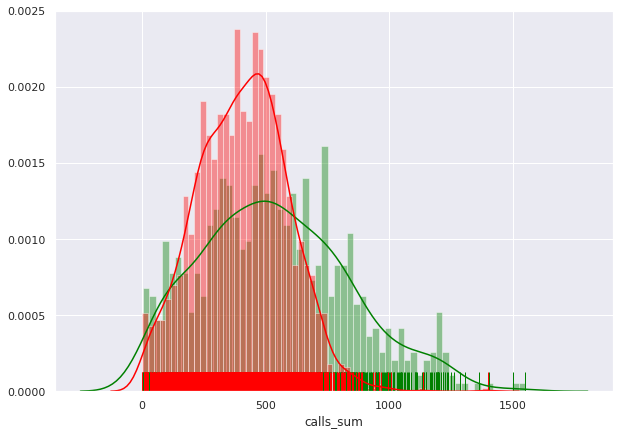

In [236]:
plt.figure(figsize=(10,7))
print(colored('Ультра. Распределение звонков' , 'green'))
func_stat(data_pivot_total_ultra['calls_sum'],'green') ;
print()
print(colored('Смарт. Распределение звонков' , 'red'))

func_stat(data_pivot_total_smart['calls_sum'], 'red') ;

plt.show()

### Анализ сообщений 

Ультра. Распределение сообщений
Дисперсия:1983.17
Стандартное отклонение: 44.53
Среднее значение:  61.40

Смарт. Распределение сообщений
Дисперсия:719.08
Стандартное отклонение: 26.82
Среднее значение:  38.79


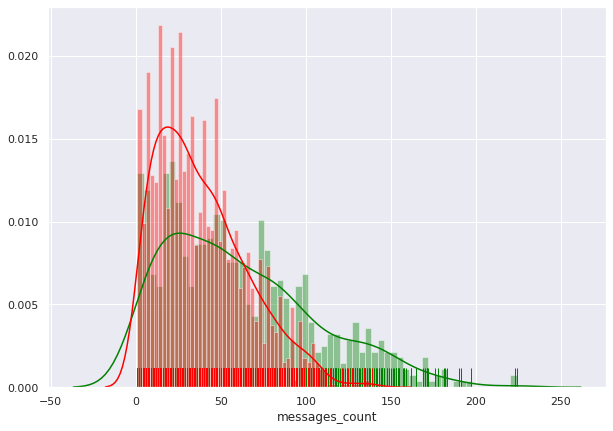

In [237]:
plt.figure(figsize=(10,7))
print(colored('Ультра. Распределение сообщений' , 'green'))
func_stat(data_pivot_total_ultra['messages_count'],'green') ;
print()

print(colored('Смарт. Распределение сообщений' , 'red'))
func_stat(data_pivot_total_smart['messages_count'], 'red') ;

plt.show()

### Анализ трафика

Ультра. Распределение трафика
Дисперсия:85788636.56
Стандартное отклонение: 9262.22
Среднее значение:  18882.08

Смарт. Распределение трафика
Дисперсия:32815315.83
Стандартное отклонение: 5728.47
Среднее значение:  16121.23


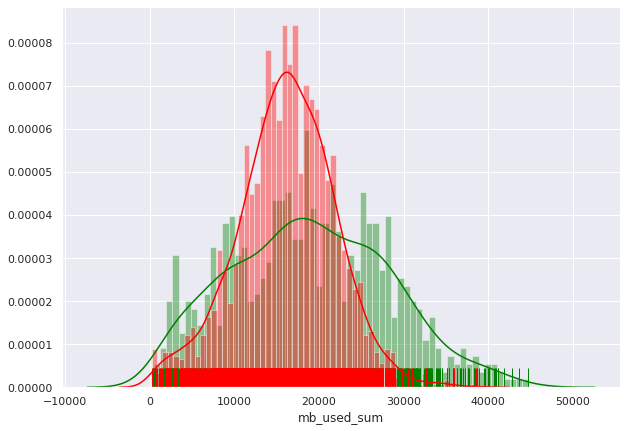

In [238]:
plt.figure(figsize=(10,7))
print(colored('Ультра. Распределение трафика' , 'green'))
func_stat(data_pivot_total_ultra['mb_used_sum'],'green') ;
print()

print(colored('Смарт. Распределение трафика' , 'red'))
func_stat(data_pivot_total_smart['mb_used_sum'], 'red') ;

plt.show()

Тест Шапиро-Вилка
p-значение для выборок с выбросами:7.726196599833202e-06
Распределение не нормально
Тест Д'Агостино
p-значение для выборок с выбросами:2.9193200366526288e-05
Распределение не нормально


###   Вывод по результатам анализа тарифов:
  Для анализа данных применена функция, которая строит график распределения и считает дисперсию, стандртное отклонение и среднее значение. Распределения отображаются на одном графике, т.к. таким образом их удобнее анализировать.
   - Анализ звонков. По графику видим, что распределение нормальное, значения равномерно распределены относительно среднего. Значение стандартного отклонения показывает определяет шиирину графика. Для пользователей тарифа "ультра" характерно большая продолжительность разговоров, при этом таких пользователей меньше. Для пользователей тарифа "смарт" характерна меньшая продолжительность разговоров.
   
   
   - Анализ сообщений. По графику видим, что распределение отличается от нормального, значений относительно среднего справа больше чем слева для обоих тарифов. У тарифа "ультра" больше пользователей, которые отправляют много сообщений. Для пользователей тарифа "смарт" характерно большее количество пользователей, которые отправляют небольшое количество сообщений в месяц.
   
   
   - Анализ сообщений. По графику видим, что распределение максимально приближено нормальному. Средние значения трафика для обоих тарифов близки, но стандартное отклонение вносит ясность. У тарифа "ультра" больше пользователей с большим трафиком. Для пользователей тарифа "смарт" характерна большее количество пользователей, которые использую трафик близкий к среднему в месяц.
----

##  Шаг 4. Проверка гипотез

In [215]:
# Из таблицы с выручкой и столбцов с городом и тарифом создаем таблицу для проверки гипотез
data_stat_analiz = pd.merge(data_pivot_revenue.pivot_table(index = 'user_id' ,
                                values = 'user_revenue' ,
                                aggfunc = 'mean'), data_users[['city' , 'tariff']], left_index = True , right_index = True)
# Выручку округляем до целого числа        
data_stat_analiz['user_revenue'] = data_stat_analiz['user_revenue'].astype(int)
data_stat_analiz

,user_revenue,city,tariff
user_id,,,
1000,1950,Краснодар,ultra
1001,851,Москва,smart
1002,957,Стерлитамак,smart
1003,1950,Москва,ultra
1004,1950,Новокузнецк,ultra
...,...,...,...
1495,2261,Иркутск,ultra
1496,2243,Вологда,smart
1497,891,Челябинск,smart


### Средняя выручка пользователей тарифов «Ультра» и «Смарт» различается

In [216]:
#Выручка пользователей тарифа Ультра
data_stat_analiz_ultra = data_stat_analiz.query("tariff== 'ultra'")['user_revenue']
data_stat_analiz_ultra.head(10)

user_id
1000    1950
1003    1950
1004    1950
1013    1950
1016    1950
1018    1950
1019    1950
1021    1950
1024    2673
1028    1950
Name: user_revenue, dtype: int64

In [217]:
#Выручка пользователей тарифа Ультра
data_stat_analiz_ultra_clear = data_stat_analiz.query("tariff== 'ultra' & user_revenue !=1950")['user_revenue']
data_stat_analiz_ultra_clear.head(10)

user_id
1024    2673
1050    2016
1060    2833
1124    2845
1126    1952
1148    2241
1165    2506
1168    2021
1180    2268
1182    1970
Name: user_revenue, dtype: int64

In [241]:
#Выручка пользователей тарифа Смарт
data_stat_analiz_smart = data_stat_analiz.query("tariff== 'smart'")['user_revenue']
data_stat_analiz_smart.head(10)

user_id
1001     851
1002     957
1005     764
1006     831
1007     825
1008     568
1009    1226
1010     883
1011    1422
1012    1671
Name: user_revenue, dtype: int64

In [242]:
#Выручка пользователей тарифа Смарт
data_stat_analiz_smart_clear = data_stat_analiz.query("tariff== 'smart' & user_revenue !=550")['user_revenue']
data_stat_analiz_smart_clear.head(10)

user_id
1001     851
1002     957
1005     764
1006     831
1007     825
1008     568
1009    1226
1010     883
1011    1422
1012    1671
Name: user_revenue, dtype: int64

In [268]:
# Проверим выборки на нормально двумя тестами

def normal_test(data):
    alpha = 0.01
    # Тест Шапиро-Вилка
    print('Тест Шапиро-Вилка')
    stat , p = shapiro(data)
    print('p-значение для выборок с выбросами:{:>5}'.format(p))
    if (p < alpha):
        print("Распределение не нормально")
    else:
        print("Распределение нормально")
       # Тест Д'Агостино
    print("Тест Д'Агостино")
    stat , p = normaltest(data)
    print('p-значение для выборок с выбросами:{:>5}'.format(p))
    if (p < alpha):
        print("Распределение не нормально")
    else:
        print("Распределение нормально")


In [269]:
normal_test(data_stat_analiz_ultra)


Тест Шапиро-Вилка
p-значение для выборок с выбросами:1.5479449239772485e-20
Распределение не нормально
Тест Д'Агостино
p-значение для выборок с выбросами:6.868146164543464e-19
Распределение не нормально


In [270]:
normal_test(data_stat_analiz_ultra_clear)

Тест Шапиро-Вилка
p-значение для выборок с выбросами:0.007706726435571909
Распределение не нормально
Тест Д'Агостино
p-значение для выборок с выбросами:0.0060488917565803
Распределение не нормально


In [271]:
normal_test(data_stat_analiz_smart)

Тест Шапиро-Вилка
p-значение для выборок с выбросами:3.897322595940514e-14
Распределение не нормально
Тест Д'Агостино
p-значение для выборок с выбросами:2.5740753510969775e-18
Распределение не нормально


In [272]:
normal_test(data_stat_analiz_smart_clear)

Тест Шапиро-Вилка
p-значение для выборок с выбросами:1.521843225439981e-13
Распределение не нормально
Тест Д'Агостино
p-значение для выборок с выбросами:6.206849551366218e-18
Распределение не нормально


Ультра. Распределение выручки с выбросами
Дисперсия:45590.59
Стандартное отклонение: 213.52
Среднее значение:  2041.97


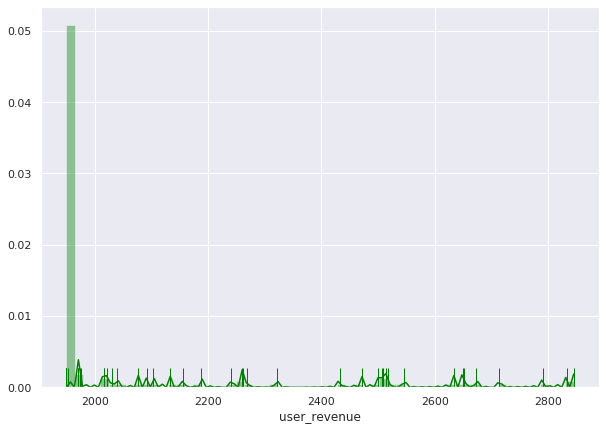

Смарт. Распределение выручки с выбросами
Дисперсия:313844.98
Стандартное отклонение: 560.22
Среднее значение:  1253.66


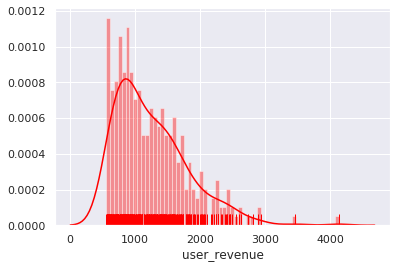

In [219]:
# Параметры выборок и график распределения значений без исключения выбросов
plt.figure(figsize=(10,7))
print(colored('Ультра. Распределение выручки с выбросами' , 'green'))
func_stat(data_stat_analiz_ultra,'green') ;
plt.show()
print(colored('Смарт. Распределение выручки с выбросами' , 'red'))
func_stat(data_stat_analiz_smart, 'red') ;

plt.show()

Ультра. Распределение выручки без выбросов
Дисперсия:81463.85
Стандартное отклонение: 285.42
Среднее значение:  2320.35


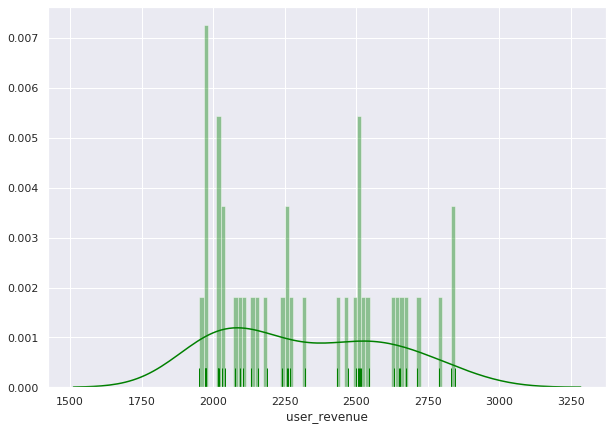

Смарт. Распределение выручки без выбросов
Дисперсия:313844.98
Стандартное отклонение: 560.22
Среднее значение:  1253.66


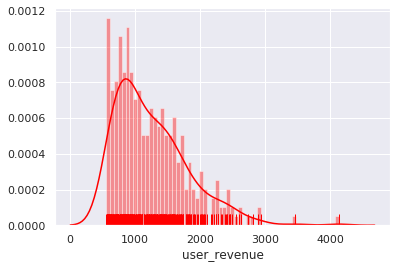

In [220]:
# Параметры выборок и график распределения значений с исключением выбросов
plt.figure(figsize=(10,7))
print(colored('Ультра. Распределение выручки без выбросов' , 'green'))
func_stat(data_stat_analiz_ultra_clear,'green') ;
plt.show()
print(colored('Смарт. Распределение выручки без выбросов' , 'red'))
func_stat(data_stat_analiz_smart_clear, 'red') ;

plt.show()

#### p-уровень значимости для выборок с выбросами

In [221]:
alpha = .05
results = st.ttest_ind(data_stat_analiz_ultra , data_stat_analiz_smart)

print('p-значение для выборок с выбросами:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение для выборок с выбросами: 2.113395969401931e-49
Отвергаем нулевую гипотезу


#### p-уровень значимости для выборок без выбросов

In [222]:
alpha = .05
results = st.ttest_ind(data_stat_analiz_ultra_clear , data_stat_analiz_smart_clear)

print('p-значение для выборок без выбросов:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение для выборок без выбросов: 5.1017345460886586e-26
Отвергаем нулевую гипотезу


### Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов

In [223]:
# Заменяем города не Москва на Другие
data_stat_analiz['city'] = data_stat_analiz['city'].apply(lambda a: a if a == 'Москва' else 'другие' )
data_stat_analiz

,user_revenue,city,tariff
user_id,,,
1000,1950,другие,ultra
1001,851,Москва,smart
1002,957,другие,smart
1003,1950,Москва,ultra
1004,1950,другие,ultra
...,...,...,...
1495,2261,другие,ultra
1496,2243,другие,smart
1497,891,другие,smart


In [273]:
#Выручка пользователей в Москве
data_stat_analiz_moscow = data_stat_analiz.query("city == 'Москва'")['user_revenue']
data_stat_analiz_moscow

user_id
1001     851
1003    1950
1007     825
1031     796
1033    1773
        ... 
1453    1950
1461    1950
1476    1950
1481    1072
1490     989
Name: user_revenue, Length: 99, dtype: int64

In [274]:
#Выручка пользователей в Москве
data_stat_analiz_moscow_clear = data_stat_analiz.query("city == 'Москва' & user_revenue !=550 & user_revenue !=1950")['user_revenue']
data_stat_analiz_moscow_clear

user_id
1001     851
1007     825
1031     796
1033    1773
1038     728
        ... 
1447    1646
1449    1012
1450     941
1481    1072
1490     989
Name: user_revenue, Length: 70, dtype: int64

In [275]:
#Выручка пользователей в других городах
data_stat_analiz_other = data_stat_analiz.query("city == 'другие'")['user_revenue']
data_stat_analiz_other

user_id
1000    1950
1002     957
1004    1950
1005     764
1006     831
        ... 
1495    2261
1496    2243
1497     891
1498    1238
1499     694
Name: user_revenue, Length: 401, dtype: int64

In [276]:
#Выручка пользователей в других городах
data_stat_analiz_other_clear = data_stat_analiz.query("city == 'другие' & user_revenue !=550 & user_revenue !=1950")['user_revenue']
data_stat_analiz_other_clear

user_id
1002     957
1005     764
1006     831
1008     568
1009    1226
        ... 
1495    2261
1496    2243
1497     891
1498    1238
1499     694
Name: user_revenue, Length: 299, dtype: int64

In [277]:
normal_test(data_stat_analiz_moscow)

Тест Шапиро-Вилка
p-значение для выборок с выбросами:9.35082516662078e-06
Распределение не нормально
Тест Д'Агостино
p-значение для выборок с выбросами:3.000579959805937e-10
Распределение не нормально


In [278]:
normal_test(data_stat_analiz_moscow_clear)

Тест Шапиро-Вилка
p-значение для выборок с выбросами:0.000999029609374702
Распределение не нормально
Тест Д'Агостино
p-значение для выборок с выбросами:0.03933892994202785
Распределение нормально


In [279]:
normal_test(data_stat_analiz_other)

Тест Шапиро-Вилка
p-значение для выборок с выбросами:1.0467371761024857e-11
Распределение не нормально
Тест Д'Агостино
p-значение для выборок с выбросами:0.01232637904094465
Распределение нормально


In [280]:
normal_test(data_stat_analiz_other_clear)

Тест Шапиро-Вилка
p-значение для выборок с выбросами:1.0524079004092801e-11
Распределение не нормально
Тест Д'Агостино
p-значение для выборок с выбросами:4.436108062449975e-09
Распределение не нормально


Москва. Распределение выручки с выбросами
Дисперсия:354172.63
Стандартное отклонение: 595.12
Среднее значение:  1422.68


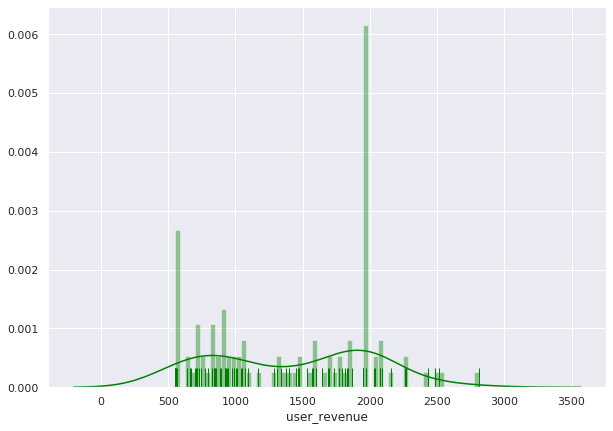

Другие . Распределение выручки с выбросами
Дисперсия:388936.73
Стандартное отклонение: 623.65
Среднее значение:  1473.26


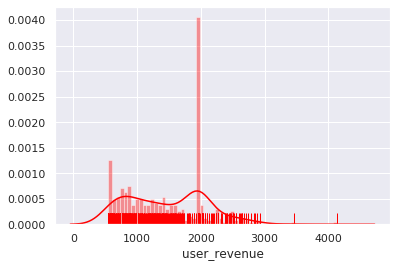

In [231]:
# Параметры выборок и график распределения значений
plt.figure(figsize=(10,7))
print(colored('Москва. Распределение выручки с выбросами' , 'green'))
func_stat(data_stat_analiz_moscow,'green') ;
plt.show()
print(colored('Другие . Распределение выручки с выбросами' , 'red'))
func_stat(data_stat_analiz_other, 'red') ;

plt.show()

Москва. Распределение выручки без выбросов
Дисперсия:330862.08
Стандартное отклонение: 575.21
Среднее значение:  1344.21


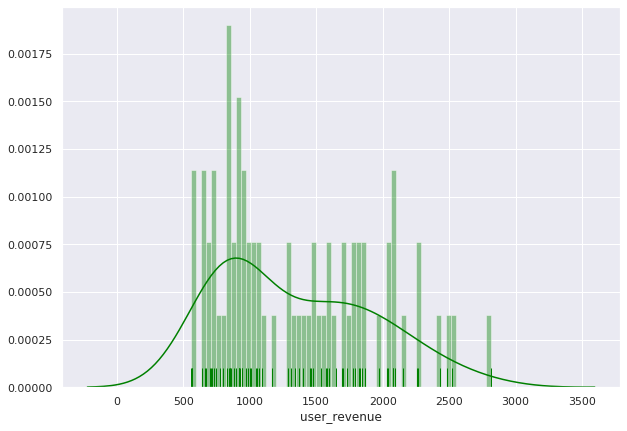

Другие. Распределение выручки без выбросов
Дисперсия:408801.38
Стандартное отклонение: 639.38
Среднее значение:  1362.13


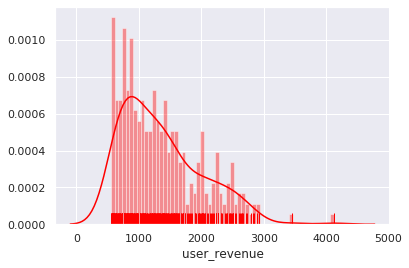

In [144]:
# Параметры выборок и график распределения значений
plt.figure(figsize=(10,7))
print(colored('Москва. Распределение выручки без выбросов' , 'green'))
func_stat(data_stat_analiz_moscow_clear,'green') ;
plt.show()
print(colored('Другие. Распределение выручки без выбросов' , 'red'))
func_stat(data_stat_analiz_other_clear, 'red') ;

plt.show()

#### p-уровень значимости для выборок с выбросами

In [235]:
alpha = .05
results = st.ttest_ind(data_stat_analiz_moscow , data_stat_analiz_other)

print('p-значение с выбросами:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение с выбросами: 0.46627168642893924
Не получилось отвергнуть нулевую гипотезу


#### p-уровень значимости для выборок без выбросов

In [233]:
alpha = .05
results = st.ttest_ind(data_stat_analiz_moscow_clear , data_stat_analiz_other_clear)

print('p-значение без выбросов:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение без выбросов: 0.829976611040419
Не получилось отвергнуть нулевую гипотезу


###   Вывод по результатам проверки гипотез:

#### Средняя выручка пользователей тарифов Ультра  и Смарт отличаются 
  Нулевая гипотеза Н0 - средняя выручка пользователей тарифов Ультра и Смарт не различаются. 
  Альтернативная гипотеза Н1 - значения средних выручек пользователей тарифов Ультра и Смарт в генеральной совокупности различны.
  Для каждой выборки построены распределения, на которых видны выбросы в виде значений абонентской платы тарифов. Соответственно распределение сильно отличается от нормального, что делает невозможным применение t-критерия Стьюдента. Для приведения распределения к нормальному исключаем значения выручки, соответствующие значениям абонентской платы. Далее сравним результаты для вариантов выборок - с учетом выбросов и без них.
  Для анализа принимаем, что значение уровня значимости не должно быть более alpha = 0,05.
  
  Для каждого варианта - с выбросами и без выбросов - методом st.ttest_ind() для двух выборок - выручки Москвы и выручки Других городов - определен t-критерией Стьюдента, по значению которого определено значение p-уровня значимости. Получившееся значение p-value говорит о том, что вероятность того, что нулевая гипотеза верна составляет 2е(-49) с учетом выбросов и 5е(-26) без учета выбросов, что значительно меньше принятого alpha, поэтому мы отвергаем нулевую гипотезу. Средние значения выручки тарифов Ультра и Смарт различны . 
  
    
#### Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов
  Нулевая гипотеза Н0 - средняя выручка пользователей Москвы и других городов не различаются. 
  Альтернативная гипотеза Н1 - значения средних выручек пользователей Москвы и Других городов в генеральной совокупности различны.
  Для каждой выборки построены распределения, на которых видны выбросы в виде значений абонентской платы тарифов. Соответственно распределение сильно отличается от нормального, что делает невозможным применение t-критерия Стьюдента. Для приведения распределения к нормальному исключаем значения выручки, соответствующие значениям абонентской платы. Далее сравним результаты для вариантов выборок - с учетом выбросов и без них.
  Для анализа принимаем, что значение уровня значимости не должно быть более alpha = 0,05.
  
  Для каждого варианта - с выбросами и без выбросов - методом st.ttest_ind() для двух выборок - выручки Москвы и выручки Других городов - определен t-критерией Стьюдента, по значению которого определено значение p-уровня значимости. Получившееся значение p-value говорит о том, что вероятность того, что нулевая гипотеза верна составляет 0,47 с учетом выбросов и 0,82 без учета выбросов, что значительно больше принятого alpha, поэтому мы принимаем нулевую гипотезу. Средние значения выручки в Москве и других городах не различаются. 
  

----

##  Шаг 5. Общий вывод